<a href="https://colab.research.google.com/github/sstoma/teaching-dl-course-2019/blob/solutions/Webinars/exercise2/exercise_cifar_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Now you should apply the same principles you've seen in the example Notebook to the [CIFAR10 data](https://www.cs.toronto.edu/~kriz/cifar.html). 
First of all let's load the libraries.

In [10]:
# to show images directly in the notebook
%matplotlib inline
import numpy as np    # scientific computing 
import matplotlib.pyplot as plt   # plotting and visualisation
# import keras and its libraries
from keras.models import Sequential # Model type to be used
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten  # Making a model
from keras.utils import np_utils  # NumPy related tools
!pip install tensorboardcolab
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback #Visulization of Accuracy and loss
from keras.datasets import cifar10
import random 
import skimage
import keras
import cv2
# to display tensorboard directly in the notebook
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Now fill in the following cells to make the notebook run:

__TASK__: download the cifar10 dataset (without transformations) and visualize it. Hint: you can find the cifar10 dataset in the keras datasets ([here](https://keras.io/datasets/)).

170500096/170498071 [==============================] - 11s 0us/step


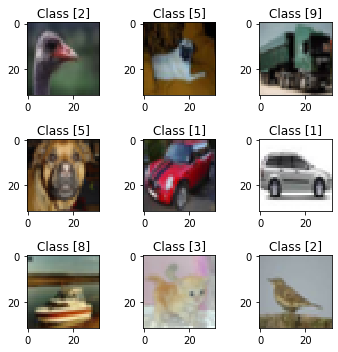

In [2]:
(X_train, y_train), (X_val, y_val) = cifar10.load_data()

plt.rcParams['figure.figsize'] = (5,5) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

__TASK__: now create a list transformations. Please note that in comparison to MNIST this dataset has 3 channels (RGB), and the proper way to normalize it would be to calculate mean and standard deviation for each channel separately.

Hint: use the following values (calculated on the whole dataset) to normalize (after transferring pixel values from 0-255 to 0-1 like the one in MNIST example):

`mean = [0.4914, 0.4822, 0.4465]`

`std = [0.2470, 0.2435, 0.2616]`

`X_train.shape = (50000, 32, 32, 3) # 3 is color`

In [3]:
# normalize inputs from 0-255 to 0-1
print(X_train[0,:,:,0])
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255.
X_val /= 255.
meanx = [0.4914, 0.4822, 0.4465]
stdx = [0.2470, 0.2435, 0.2616]
for i in range(3):
  X_train[:,:,:, i] = (X_train[:,:,:, i] - meanx[ i ]) / stdx[ i ]
  X_val[:,:,:, i] = (X_val[:,:,:, i] - meanx[ i ]) / stdx[ i ]

[[ 59  43  50 ... 158 152 148]
 [ 16   0  18 ... 123 119 122]
 [ 25  16  49 ... 118 120 109]
 ...
 [208 201 198 ... 160  56  53]
 [180 173 186 ... 184  97  83]
 [177 168 179 ... 216 151 123]]


__TASK__: Now change the type of classes to the one-hot format

In [0]:
Y_train = np_utils.to_categorical(y_train)
Y_val = np_utils.to_categorical(y_val)

__TASK__: Create a tensorboard summary writer, start the tensorboard in your browser. Hint: You can take it from the script of "Mnist_DL_Example_Keras".

In [5]:
tbc=TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
https://23974843.ngrok.io


__TASK__: write a model (or take one from the example Notebook) and train it for 10 epochs. Note: keep in mind that the input size is different for CIFAR.

In [15]:
input_size = 32
modelCNN = Sequential([
    
    # Convolution Layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(input_size, input_size, 3)), # 32 different 3x3 kernels -- so 32 feature maps
    MaxPooling2D(pool_size=(2, 2)), # Pool the max values over a 2x2 kernel

    # Convolution Layer 2
    Conv2D(64, (3, 3), activation='relu'), # 64 different 3x3 kernels 
    MaxPooling2D(pool_size=(2, 2)),

    # Convolution Layer 3
    Conv2D(128, (3, 3), activation='relu'), # 128 different 3x3 kernels

    Flatten(), # Flatten final 7x7x128 output matrix into a 1024-length vector 

    # Fully Connected Layer 4
    Dense(512), # 512 FCN nodes
    Activation('relu'),
    Dropout(0.2),
    Dense(10),
    Activation('softmax'),
])
modelCNN.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         


In [18]:
modelCNN.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

modelCNN.fit(X_train, Y_train, 
          validation_data=(X_val, Y_val),
          epochs=5, batch_size=1024,
          verbose=1,
          callbacks=[TensorBoardColabCallback(tbc)])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples







Epoch 1/5
50000/50000 [==============================] - 64s 1ms/step - loss: 1.7169 - acc: 0.3793 - val_loss: 1.4357 - val_acc: 0.4931

Epoch 2/5
50000/50000 [==============================] - 64s 1ms/step - loss: 1.3152 - acc: 0.5315 - val_loss: 1.1925 - val_acc: 0.5758
Epoch 3/5
50000/50000 [==============================] - 64s 1ms/step - loss: 1.1352 - acc: 0.6019 - val_loss: 1.0640 - val_acc: 0.6250
Epoch 4/5
50000/50000 [==============================] - 64s 1ms/step - loss: 1.0282 - acc: 0.6371 - val_loss: 1.0112 - val_acc: 0.6416
Epoch 5/5
50000/50000 [==============================] - 64s 1ms/step - loss: 0.9384 - acc: 0.6716 - val_loss: 0.9665 - val_acc: 0.6630


__TASK__: Increase/decrease the number of layers in your architecture (can be
either fully connected network or CNN) to get the best performance of
your model.


__TASK__: Change hyperparameters such as [dropout](https://pytorch.org/docs/stable/nn.html#dropout-layers),
[learning rate](https://pytorch.org/docs/stable/optim.html), [optimization functions](https://pytorch.org/docs/stable/optim.html#algorithms), ... to reach to the best performance on this classification task.


__TASK__: Compare all your models by using the Tensorboard.

In [0]:
# ideas
# use data augmentation
# use smaller network (to get some ideas what works and what is ot working)
# Baseline + Increasing Dropout + Data Augmentation + Batch Normalization: 88.620%
# https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
# transferlearning from VGG-16

#TODO add multiple model handling and permanent storage via gdrive to compare models

In [26]:
# exploring tranfer lerning
resnet50v2 = keras.applications.resnet_v2.ResNet50V2(include_top=False, weights='imagenet', input_shape=(224,224,3), input_tensor=None, pooling=None, classes=1000)
resnet50v2.summary()
# input is (224, 224,3) so the data needs to be converted
# direct conversion leads to memory loss, so one can use generator
def gen_data(data, labels, batch_size):
    while True:
        for i in range(0,labels.shape[0] // batch_size):
            temp_batch_data = data[batch_size*i:batch_size*(i+1)]
            batch_labels = labels[batch_size*i:batch_size*(i+1)]
            batch_data = []
            for j in range(0, len(temp_batch_data)):
                batch_data.append(cv2.resize(temp_batch_data[j],(224, 224),interpolation=cv2.INTER_CUBIC))
            c = np.array(batch_data).astype('float32')
            yield c,batch_labels
# X_train_up = skimage.transform.resize( X_train, (50000, 224, 224, 3) )
# img, lab = next(gen_data(X_train, Y_train, 10))
# plt.imshow(img[1], cmap='gray', interpolation='none')
modelRESNET = Sequential()
resnet50v2.trainable = False
modelRESNET.add( resnet50v2)
modelRESNET.add( Flatten() )
modelRESNET.add( Dense( 256, activation='relu' ) )
modelRESNET.add( Dense(10, activation='softmax'))
modelRESNET.summary()



Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [0]:
modelRESNET.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
bs = 1024
modelRESNET.fit(gen_data(X_train, Y_train, bs), 
          validation_data=gen_data(X_val, Y_val, bs),
          epochs=2, 
          verbose=1,
          steps_per_epoch=len(Y_train)//bs,
          validation_steps=len(Y_val)//bs
          )

Epoch 1/2
 3/48 [>.............................] - ETA: 1:40:46 - loss: 7.8392 - acc: 0.2288